<a href="https://colab.research.google.com/github/delphi9/Learning/blob/Deep-Learning/single_layer_network_ex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import multivariate_normal, permutation
import pandas as pd
from pandas import DataFrame, Series

np.random.seed(20160604)
tf.set_random_seed(20160614)

In [0]:
mnist = input_data.read_

In [0]:
def generate_datablock(n, mu, var, t):
  data = multivariate_normal(mu, np.eye(2)*var, n)
  df = DataFrame(data, columns = ['x1', 'x2'])
  df['t'] = t
  return df

df0 = generate_datablock(15, [7,7], 22, 0)
df1 = generate_datablock(15, [22,7], 22, 0)
df2 = generate_datablock(10, [7,22], 22, 0)
df3 = generate_datablock(25, [20,20], 22, 1)

df = pd.concat([df0, df1, df2, df2], ignore_index = True)
train_set = df.reindex(permutation(df.index)).reset_index(drop = True)


In [0]:
train_x = train_set[['x1', 'x2']].as_matrix()
train_t = train_set['t'].as_matrix().reshape([len(train_set),1])

In [5]:
num_units = 2
mult = train_x.flatten().mean()
x = tf.placeholder(tf.float32, [None,2])

w1 = tf.Variable(tf.truncated_normal([2, num_units]))
b1 = tf.Variable(tf.zeros([num_units]))
hidden1 = tf.nn.tanh(tf.matmul(x, w1)+b1*mult)

w0 = tf.Variable(tf.zeros([num_units, 1]))
b0 = tf.Variable(tf.zeros([1]))
p = tf.nn.sigmoid(tf.matmul(hidden1, w0)+b0*mult)


Instructions for updating:
Colocations handled automatically by placer.


In [0]:
t = tf.placeholder(tf.float32, [None,1])
loss = -tf.reduce_sum(t*tf.log(p)+(1-t)*tf.log(1-p))
train_step = tf.train.GradientDescentOptimizer(0.001).minimize(loss)
correct_prediction = tf.equal(tf.sign(p-0.5), tf.sign(t-0.5))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
                     

In [9]:
sess = tf.InteractiveSession()
sess.run(tf.initialize_all_variables())

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [10]:
i = 0
for _ in range(1000):
  i +=1
  sess.run(train_step, feed_dict = {x:train_x, t:train_t})
  if i % 100 == 0:
    loss_val, acc_val = sess.run(
      [loss, accuracy], feed_dict = {x:train_x, t:train_t})
    print ('Step : %d, Loss : %f, Accuracy : %f'
          % (i, loss_val, acc_val))

Step : 100, Loss : 0.061354, Accuracy : 1.000000
Step : 200, Loss : 0.031561, Accuracy : 1.000000
Step : 300, Loss : 0.021252, Accuracy : 1.000000
Step : 400, Loss : 0.016021, Accuracy : 1.000000
Step : 500, Loss : 0.012858, Accuracy : 1.000000
Step : 600, Loss : 0.010737, Accuracy : 1.000000
Step : 700, Loss : 0.009218, Accuracy : 1.000000
Step : 800, Loss : 0.008074, Accuracy : 1.000000
Step : 900, Loss : 0.007185, Accuracy : 1.000000
Step : 1000, Loss : 0.006469, Accuracy : 1.000000


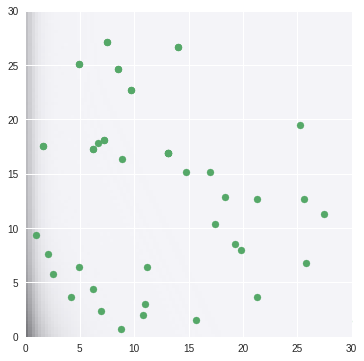

In [14]:
train_set1 = train_set[train_set['t']==1]
train_set2 = train_set[train_set['t']==0]

fig = plt.figure(figsize = (6,6))
subplot = fig.add_subplot(1,1,1)
subplot.set_ylim([0,30])
subplot.set_xlim([0,30])
subplot.scatter(train_set1.x1, train_set1.x2, marker = 'x')
subplot.scatter(train_set2.x1, train_set2.x2, marker = 'o')

locations = []
for x2 in np.linspace(0, 30, 100):
  for x1 in np.linspace(0, 30, 100):
     locations.append((x1, x2))
p_vals = sess.run(p, feed_dict = {x:locations})
p_vals = p_vals.reshape((100, 100))
subplot.imshow(p_vals, origin = 'lower', extent = (0, 30, 0, 30), cmap = plt.cm.gray_r, alpha = 0.5)
